### Assignment 1(EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from an Excel file
df = pd.read_excel('3Signet_data_1.xlsx')

# Split the single column containing semicolon-separated values into multiple columns
# Assuming the column is the first one (index 0)
df = df.iloc[:, 0].str.split(';', expand=True)

# Rename the columns to match the actual headers
column_headers = [
    'Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification",
    "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced',
    'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
    'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP', 'Target'
]

# Assign the headers to the new DataFrame
df.columns = column_headers

# Display the first few rows of the separated dataset
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666666666666666,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.0,0,13.9,-0.3,0.79,Graduate


In [3]:
# Checking Feature data types
df.dtypes

Marital status                                    object
Application mode                                  object
Application order                                 object
Course                                            object
Daytime/evening attendance                        object
Previous qualification                            object
Previous qualification (grade)                    object
Nacionality                                       object
Mother's qualification                            object
Father's qualification                            object
Mother's occupation                               object
Father's occupation                               object
Admission grade                                   object
Displaced                                         object
Educational special needs                         object
Debtor                                            object
Tuition fees up to date                           object
Gender                         

In [4]:
# Categorical columns
categorical_columns = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
    'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation',
    'Father\'s occupation', 'Displaced', 'Educational special needs', 
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
    'International', 'Target'
]

# Numerical columns
numerical_columns = [
    'Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
    'Unemployment rate', 'Inflation rate', 'GDP'
]

# Adjust dtypes
df[categorical_columns] = df[categorical_columns].astype('category')
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Verify changes
df.dtypes

Marital status                                    category
Application mode                                  category
Application order                                 category
Course                                            category
Daytime/evening attendance                        category
Previous qualification                            category
Previous qualification (grade)                     float64
Nacionality                                       category
Mother's qualification                            category
Father's qualification                            category
Mother's occupation                               category
Father's occupation                               category
Admission grade                                    float64
Displaced                                         category
Educational special needs                         category
Debtor                                            category
Tuition fees up to date                           catego

In [5]:
# Checking for number of rows and columns
df.shape

(4424, 37)

In [6]:
# More robust information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance                      4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

In [7]:
# Count missing values in each column
missing_values_count = df.isna().sum()
print(missing_values_count)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
# For categorical columns
categorical_columns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
                       'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification',
                       'Mother\'s occupation', 'Father\'s occupation', 'Displaced', 'Educational special needs', 
                       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']

# Print value counts for categorical columns
for col in categorical_columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")


Value counts for Marital status:
Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64

Value counts for Application mode:
Application mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
26       1
27       1
57       1
Name: count, dtype: int64

Value counts for Application order:
Application order
1    3026
2     547
3     309
4     249
5     154
6     137
0       1
9       1
Name: count, dtype: int64

Value counts for Course:
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
8014    215
171     215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64

Value counts for Daytime/evening attendance:
Daytime/evening attendance
1    3941
0     483
Name: count, dtype: int64

Value counts for Previous qualification:
Prev

In [9]:
# For numerical columns
numerical_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
                     'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
                     'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
                     'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
                     'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
                     'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
                     'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
                     'Unemployment rate', 'Inflation rate', 'GDP']

# Describe numerical columns
df[numerical_columns].describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [10]:
# Dictionary to map old column names to new column names
rename_columns = {
    'Nacionality': 'Nationality',
    'Mother\'s qualification': 'Mother_qualification',
    'Father\'s qualification': 'Father_qualification',
    'Mother\'s occupation': 'Mother_occupation',
    'Father\'s occupation': 'Father_occupation'
}

# Rename the columns
df.rename(columns=rename_columns, inplace=True)

# Check if the columns are renamed
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality', 'Mother_qualification',
       'Father_qualification', 'Mother_occupation', 'Father_occupation',
       'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
  

In [11]:
# New categorical columns
categorical_columns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
                       'Previous qualification', 'Nationality', 'Mother_qualification','Father_qualification', 'Mother_occupation', 'Father_occupation', 'Displaced', 'Educational special needs', 
                       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']

### Univariate Analysis

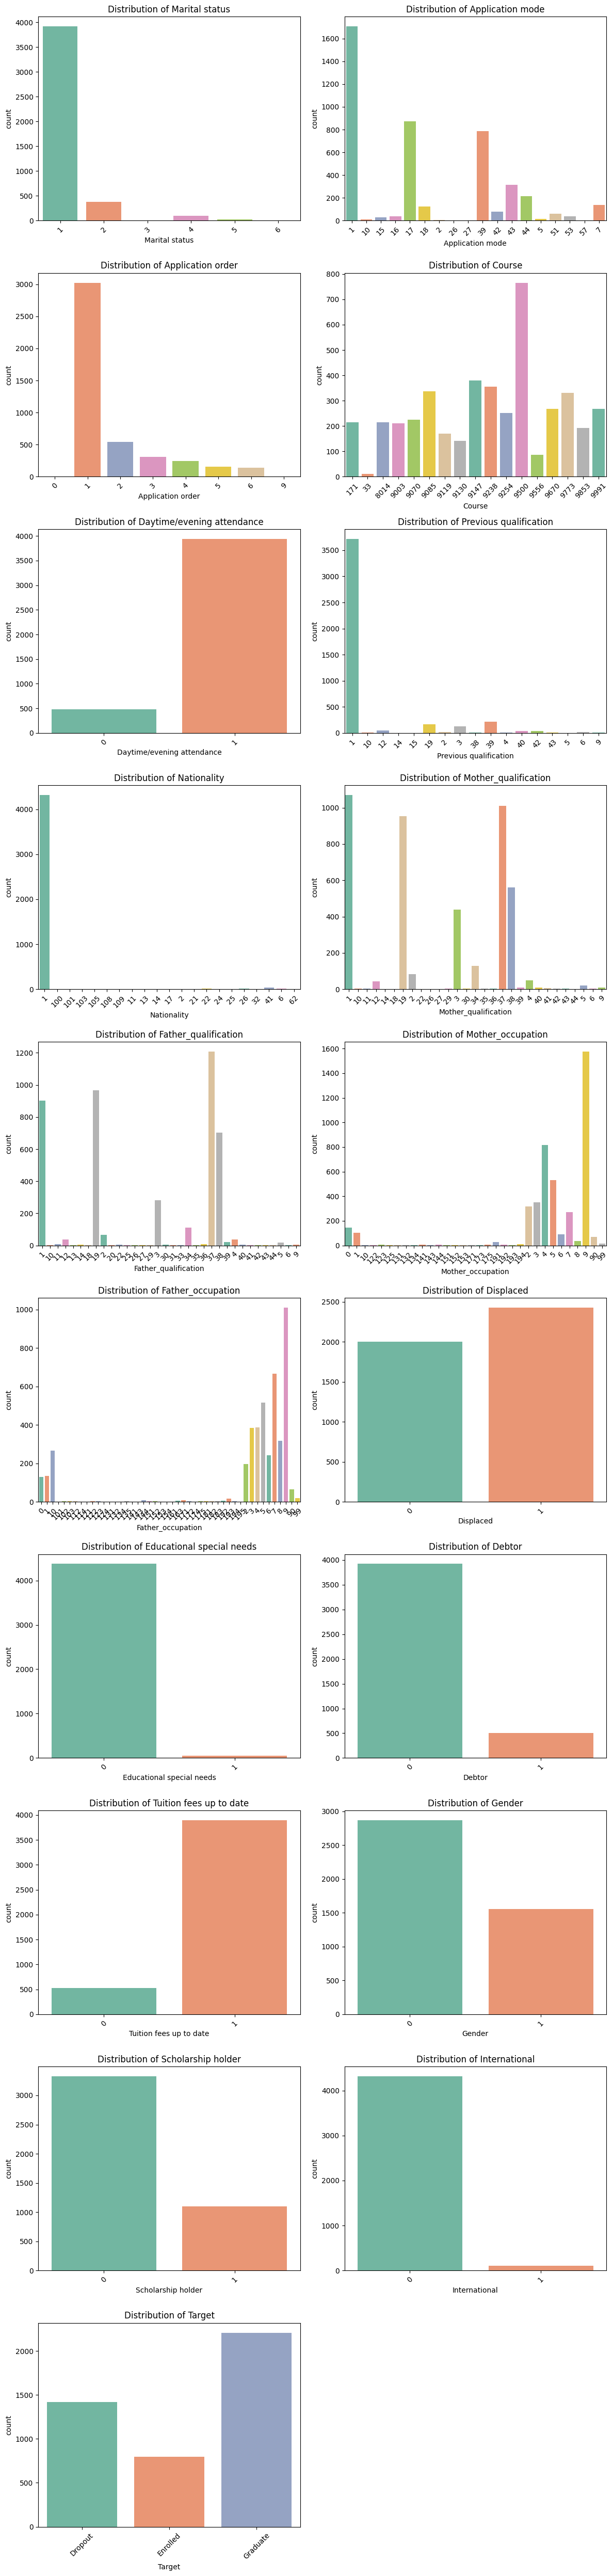

In [12]:
# Plot categorical features
# Number of columns and rows needed
num_cols = 2
num_features = len(categorical_columns)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate rows needed

# Adjust the figure size based on the number of rows and columns
plt.figure(figsize=(12, num_rows * 5))  # Adjust height to fit all rows

for i, col in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplot grid
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

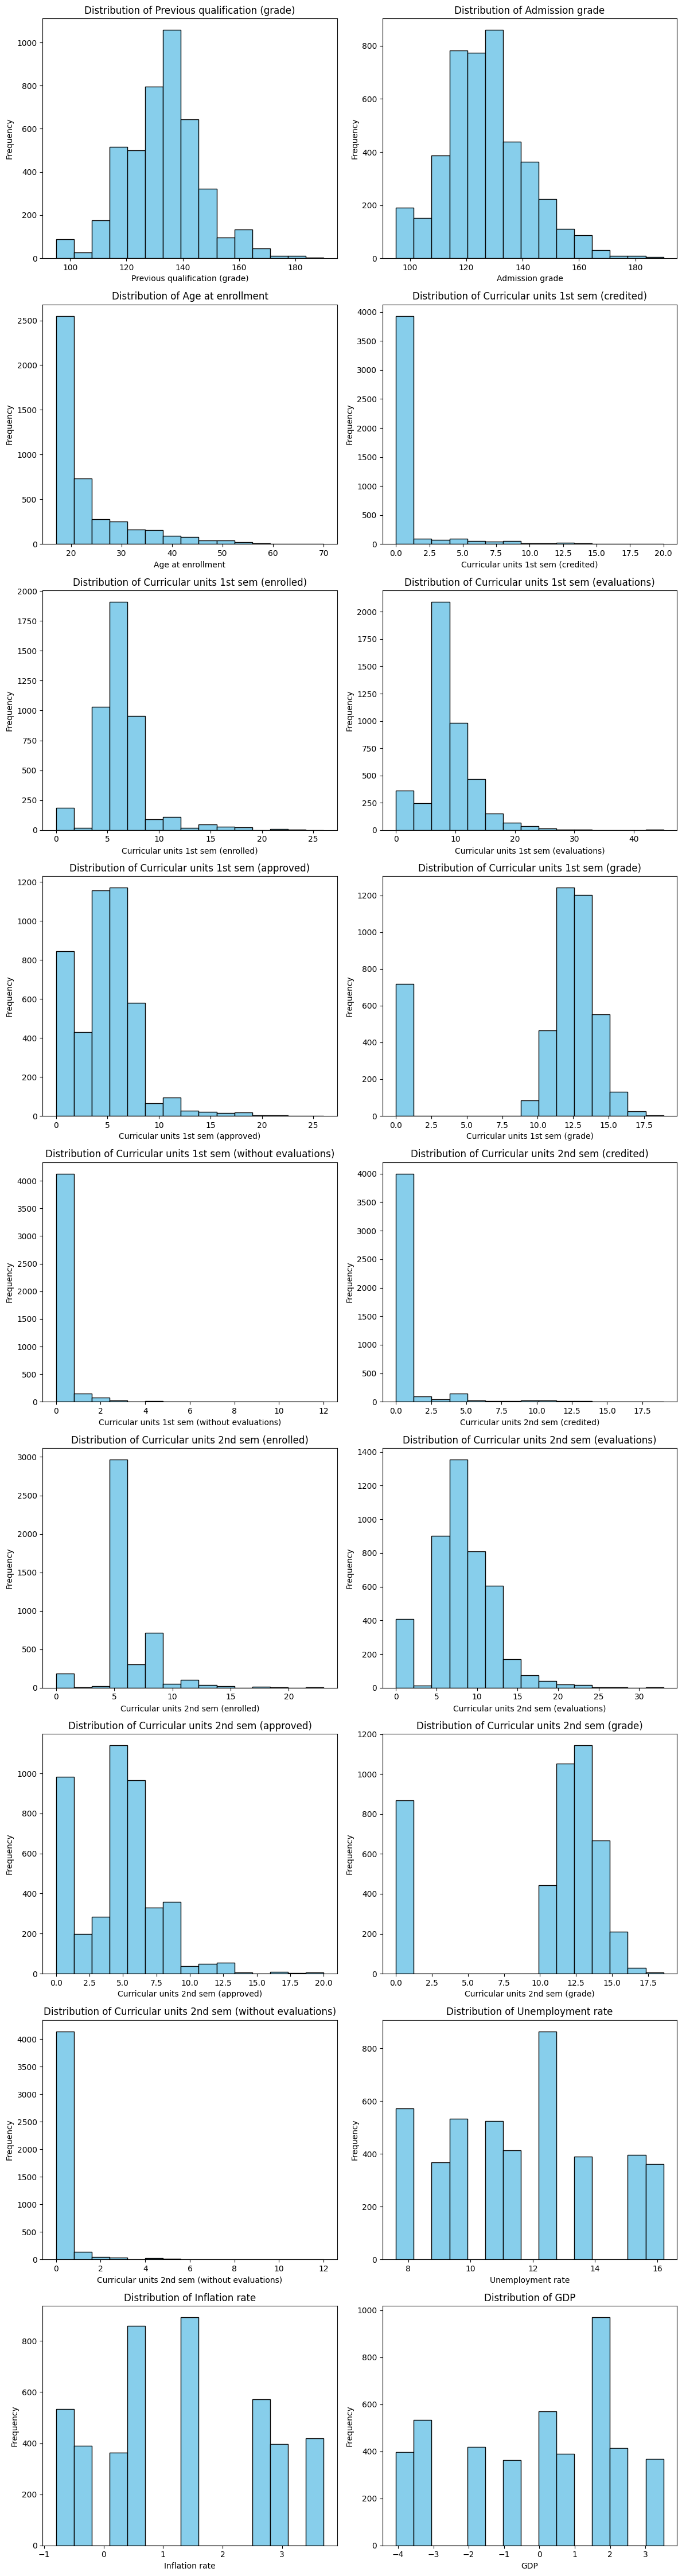

In [13]:
num_cols = 2
num_features = len(numerical_columns)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate rows needed

# Adjust the figure size based on the number of rows and columns
plt.figure(figsize=(12, num_rows * 5))  # Adjust height to fit all rows

for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplot grid
    plt.hist(df[col], bins=15, color='skyblue', edgecolor='black')  # Set color and edge color
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

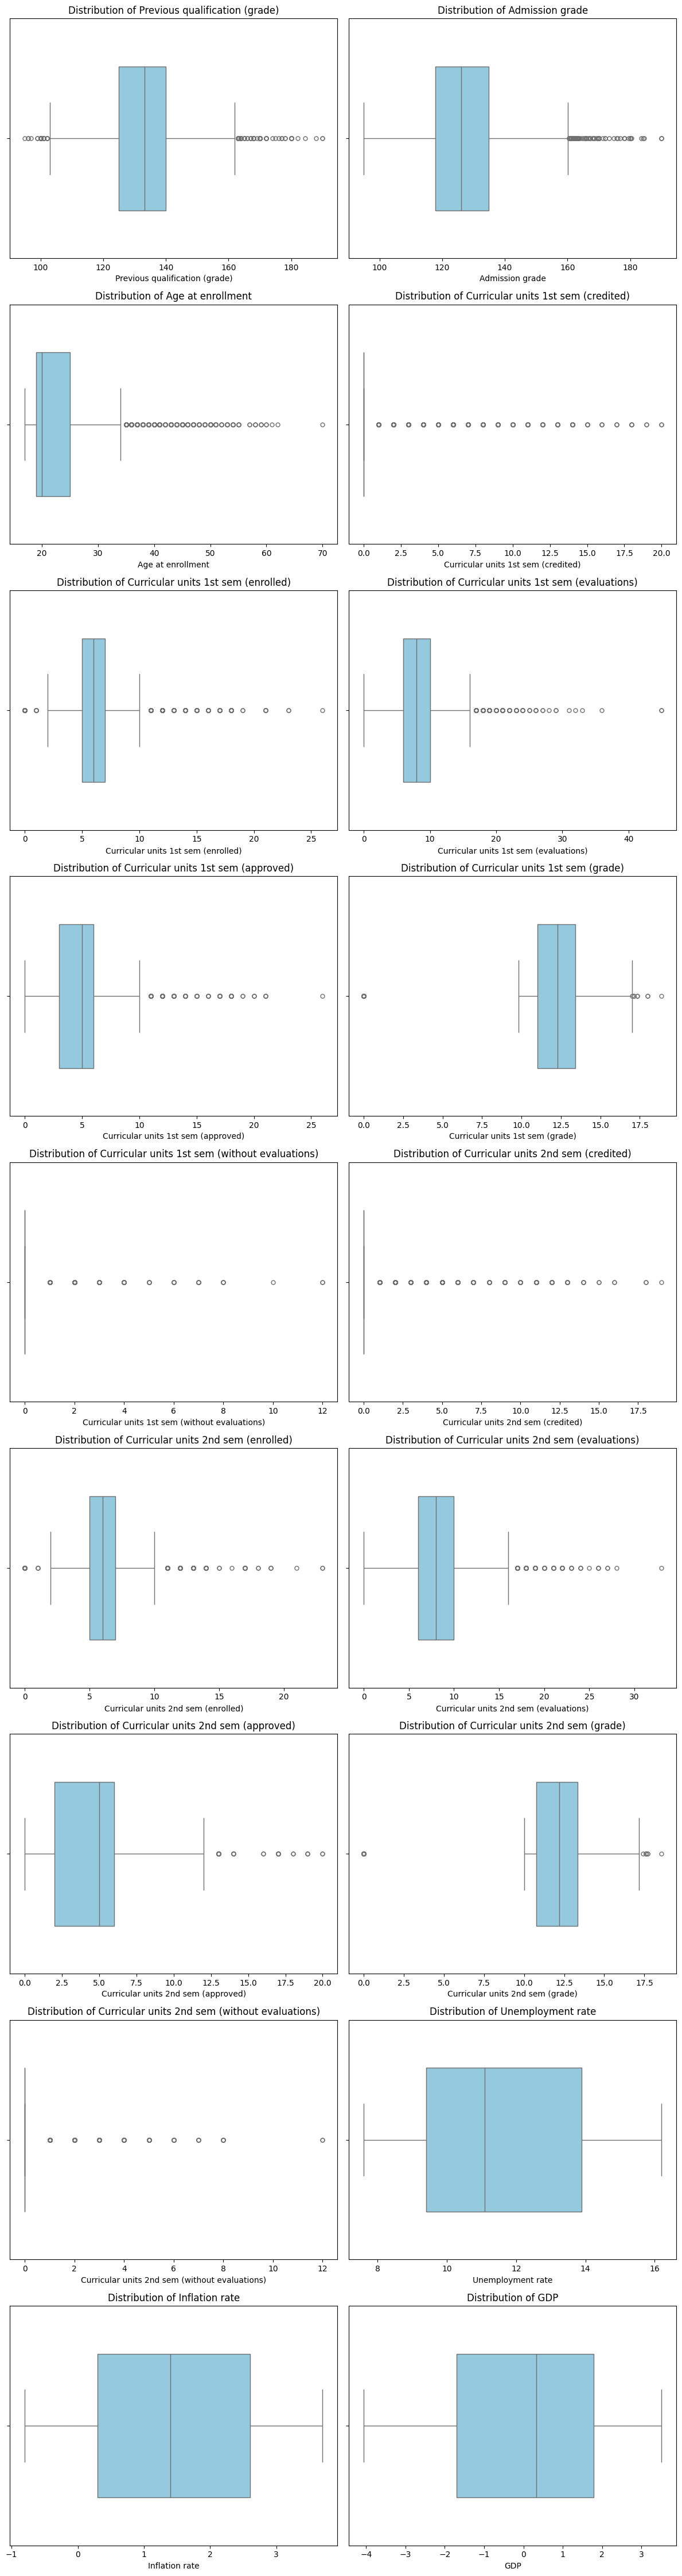

In [14]:
# Adjust the figure size based on the number of rows and columns
plt.figure(figsize=(12, num_rows * 5))  # Adjust height to fit all rows

for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplot grid
    sns.boxplot(data=df, x=col, color='skyblue', fliersize=5, width=0.6)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

Tree-based algorithms, such as Decision Trees, Random Forests, and Gradient Boosting Machines, are generally considered to be less sensitive to outliers compared to some other machine learning algorithms. I will be using a tree based algoithm to handle these outliers

### Bi-variate Analysis

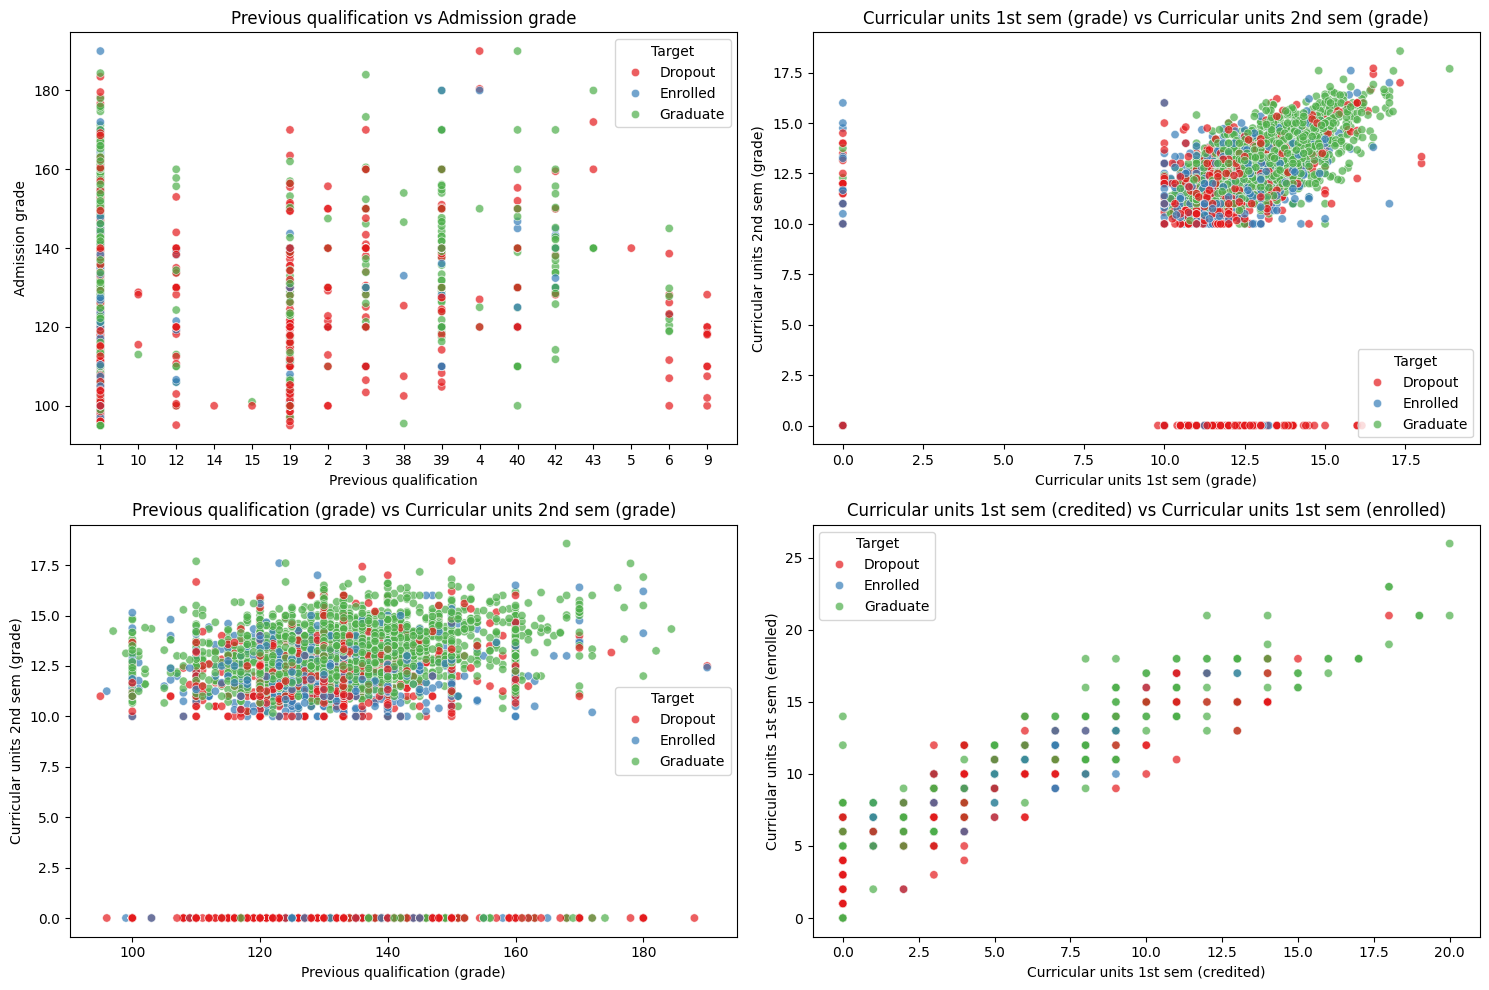

In [15]:
# Define the pairs of variables
num_pairs = [('Previous qualification', 'Admission grade'),
             ('Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'),
             ('Previous qualification (grade)', 'Curricular units 2nd sem (grade)'),
             ('Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)')]

# Set up the figure size and layout
num_cols = 2
num_rows = len(num_pairs) // num_cols + (len(num_pairs) % num_cols > 0)  # Number of rows needed

plt.figure(figsize=(15, num_rows * 5))  # Adjusting height to fit all rows

# Create subplots
for i, (var1, var2) in enumerate(num_pairs):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(data=df, x=var1, y=var2, hue='Target', palette='Set1', alpha=0.7)
    plt.title(f'{var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend(title='Target')

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother_qualification,Father_qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


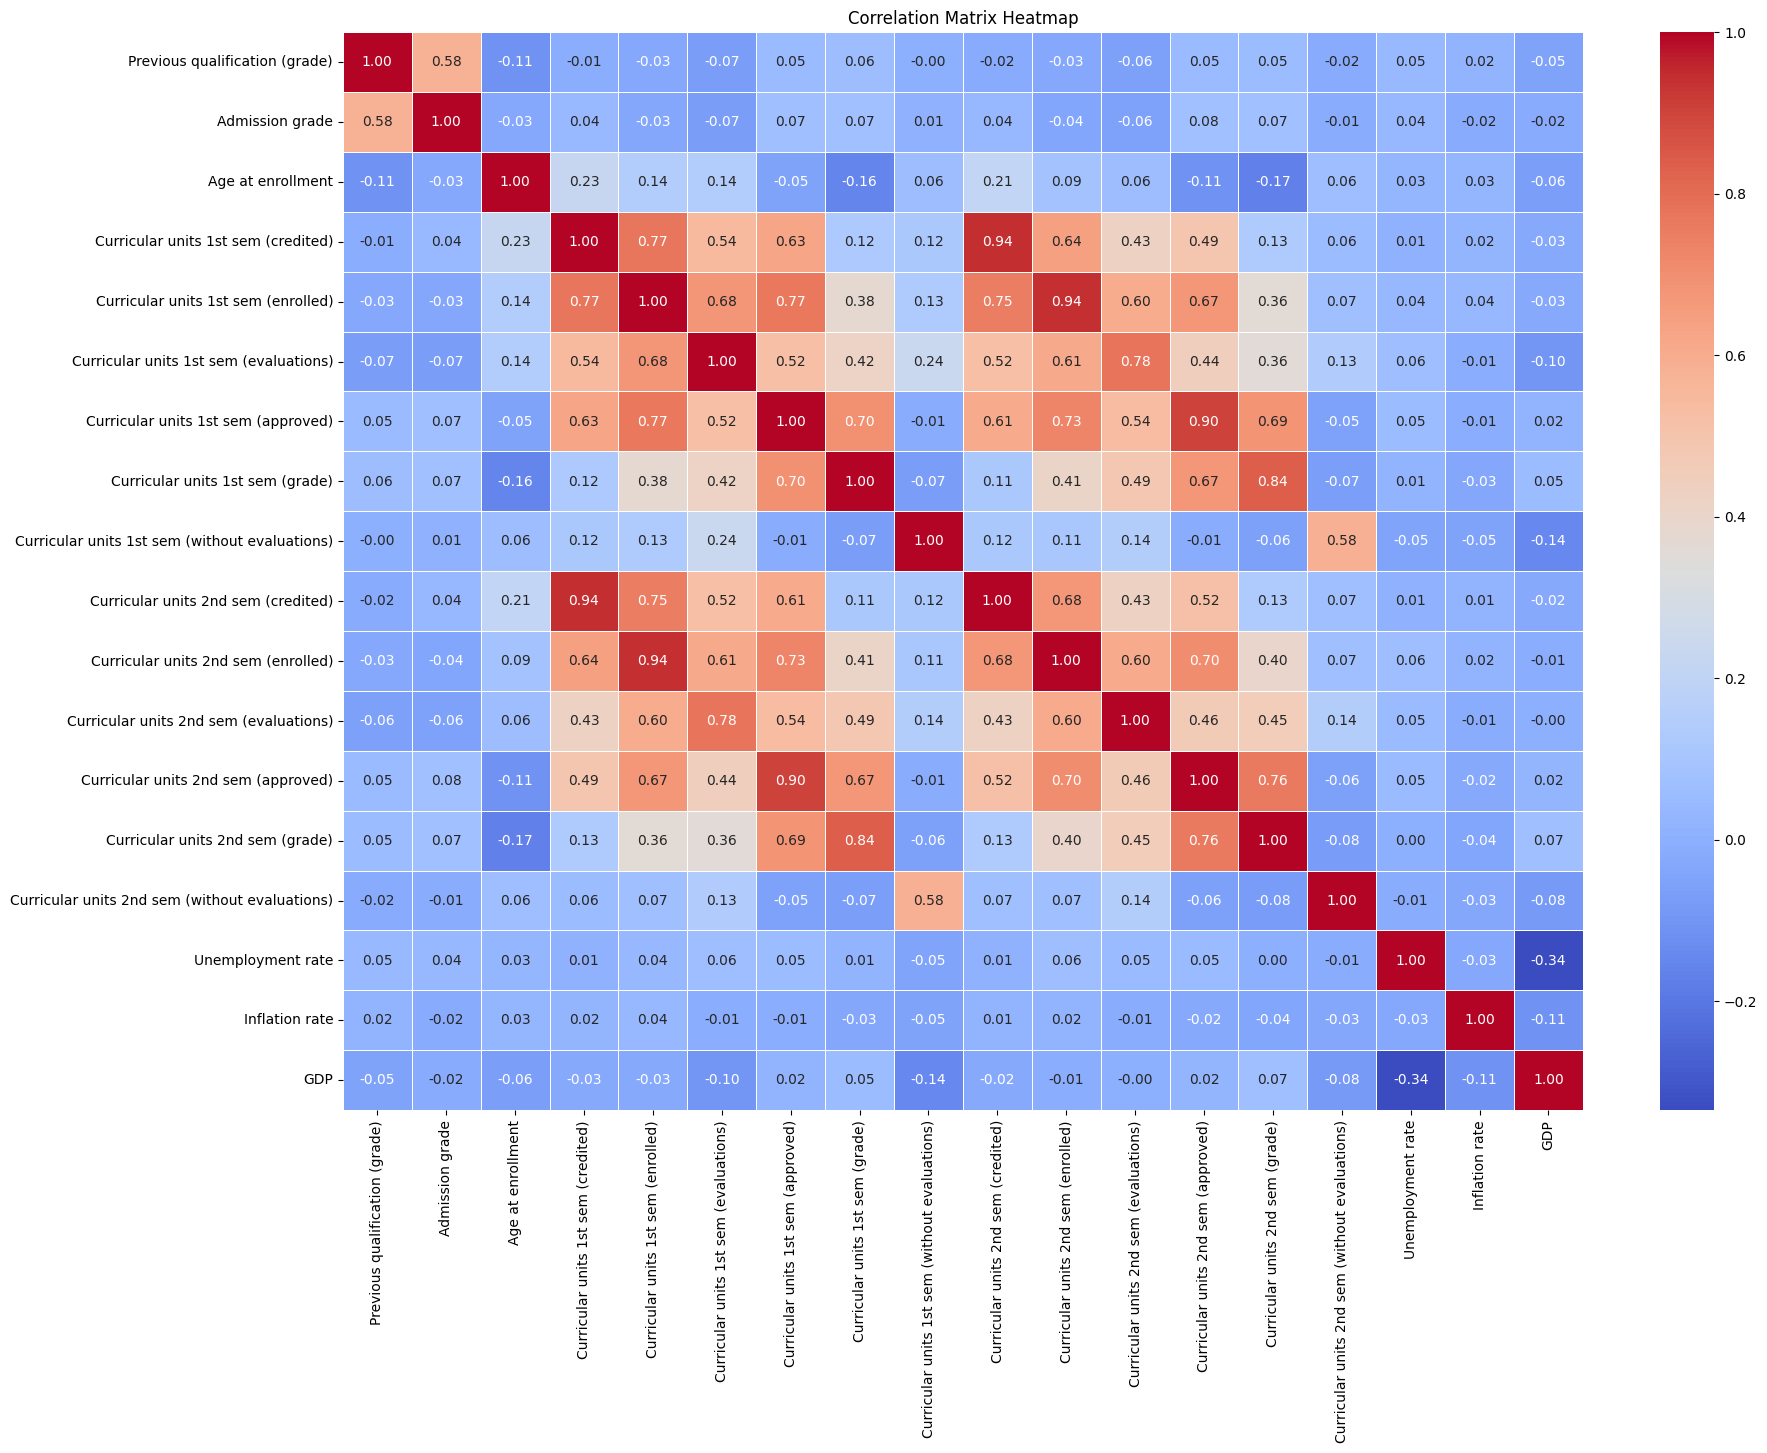

In [17]:
# Filter out numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
df.to_excel('student_data.xlsx', index=False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance                      4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nationality                                     4424 non-null   category
 8   Mother_qualification                            4424 non-null   category
 9   Father_qualification          

In [22]:
df.to_pickle('data.pkl')